Image to be tested...

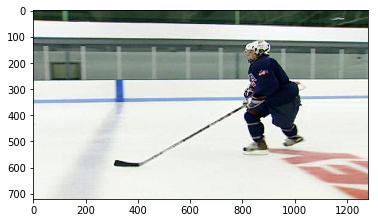

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
%matplotlib inline
import pylab as plt

img_num = 532;
test_image = 'testing/sample_image/hockey1/' + str(img_num).zfill(3) + '.jpg'

oriImg = cv.imread(test_image) # B,G,R order
f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying

Retrieve the ground truth annotations...

In [2]:
import h5py

ground_truth = h5py.File('testing/sample_image/hockey1/annot.h5', 'r')

filename = ground_truth['imgname'][img_num-1]
print(''.join(chr(int(i)) for i in filename))

# 0 - right ankle
# 1 - right knee
# 2 - right hip
# 3 - left hip
# 4 - left knee
# 5 - left ankle
# 6 - pelvis
# 7 - thorax
# 8 - upper neck
# 9 - top head
# 10 - right wrist
# 11 - right elbow
# 12 - right shoulder
# 13 - left shoulder
# 14 - left elbow
# 15 - left wrist
# 16 - top of stick
# 17 - bottom of stick
parts_gt = ground_truth['part'][img_num-1]

532.jpg


/home/stephen/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Align the ground truth and detected keypoints...

In [3]:
interp_nose = (parts_gt[9] + parts_gt[8])/2

points_gt = np.concatenate((np.array([interp_nose]), parts_gt[[8,12,11,10,13,14,15,2,1,0,3,4,5]]))
print(points_gt)

[[841.55660377 151.29245283]
 [835.44339623 190.00943396]
 [846.31132075 202.23584906]
 [884.3490566  255.21698113]
 [830.00943396 298.68867925]
 [874.83962264 195.44339623]
 [930.53773585 285.10377358]
 [836.80188679 339.44339623]
 [889.78301887 319.06603774]
 [813.70754717 406.00943396]
 [872.12264151 513.33018868]
 [982.16037736 324.5       ]
 [964.5        439.97169811]
 [994.38679245 488.87735849]]


Visualize ground truth keypoints...

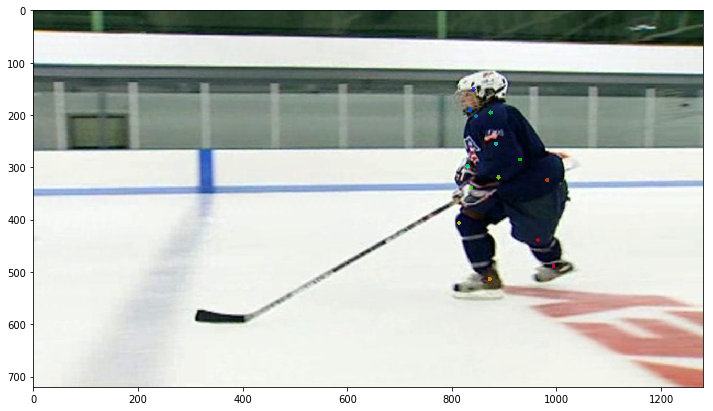

In [4]:
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv.imread(test_image) # B,G,R order

for i in range(14):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    cv.circle(canvas, (int(points_gt[i][0]), int(points_gt[i][1])), 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

Run openpose predictor and get the predicted keypoints...

In [ ]:
import testing.python.predictor as predictor

openpose_predict = predictor.OpenPosePredictor()
parts_dt = openpose_predict.getKeypoints(test_image)

Visualize the detected keypoints...

In [ ]:
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv.imread(test_image) # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv.circle(canvas, parts_dt[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

Calculate PCKh score...

In [ ]:
length_head = np.linalg.norm(parts_gt[9] - parts_gt[8])
thresh = 0.5*length_head

num_points = 0
num_correct = 0
for i in range(14):
    num_points += 1
    point_gt = points_gt[i]
    for j in range(len(parts_dt[i])):
        point_dt = np.array([parts_dt[i][j][0], parts_dt[i][j][1]])
        dist = np.linalg.norm(point_gt - point_dt)
        if (dist < thresh):
            num_correct += 1
            break
        else:
            print(i)

print(num_correct)
print(num_points)